# Assign layers with specific thicknesses and rocktypes

We set the dimension of the map based on the requested dimension from **Badlands XmL** input file.

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = FutureWarning)

import matplotlib
import cmocean as cmo
from matplotlib import cm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

label_size = 8
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# display plots in SVG format
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## 1- Reading surface file

We first read the input topographic file given to **Badlands**

In [4]:
xyzfile = 'data/deltaHR.csv'
xyz = pd.read_csv(xyzfile, sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)

xr = xyz.values[:,0]
yr = xyz.values[:,0]
dx = xr[1]-xr[0]

nx = int((xr[-1]-xr[0])/dx)+1
ny = int((yr[-1]-yr[0])/dx)+1

assert nx*ny==len(xr), 'Values not matching'

xm = xr.reshape((nx,ny),order='F')
ym = yr.reshape((nx,ny))

print('Regular grid resolution:',nx,ny)

Regular grid resolution: 481 481


## 2- Creating one thickness, one rock type layer

In its most simple form a layer will be composed of an uniform thickness and only one rock type.

In the example below we use a thickness of 250 m and we define a unique rock ID equals to 0

In [5]:
layth = 250.
rockID = 0

th = np.zeros(len(xr),dtype=float)
rock = np.zeros(len(xr),dtype=int)

th.fill(layth)
rock.fill(rockID)

The input file that baldands will read will be of the following format:

In [6]:
df = pd.DataFrame({'thickness':th,'rockID':rock},columns=['thickness','rockID'])
df.head()

,thickness,rockID
0,250.0,0
1,250.0,0
2,250.0,0
3,250.0,0
4,250.0,0


We save the file in the data folder:

In [7]:
df.to_csv('data/thlay0.csv',columns=['thickness','rockID'], sep=' ', index=False ,header=0)

## 2- Creating one thickness, multiple rock types layer

To define multiple rock types, you can simply do like this... obviously this is a super simple example

In [8]:
layth = 250.

th = np.zeros(len(xr),dtype=float)
th.fill(layth)

rock = np.zeros((nx,ny),dtype=int)

rock[:240,:] = 0
rock[240:,:] = 1

In [9]:
df = pd.DataFrame({'thickness':th,'rockID':rock.flatten(order='F')},columns=['thickness','rockID'])
df.head()

,thickness,rockID
0,250.0,0
1,250.0,0
2,250.0,0
3,250.0,0
4,250.0,0


Looks like this

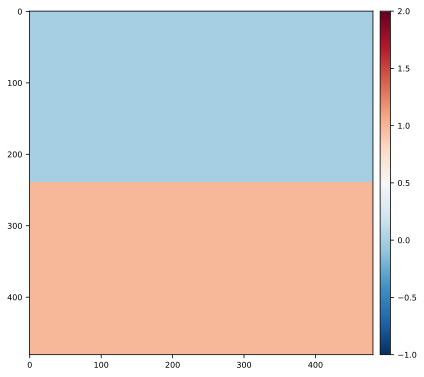

In [10]:
fig = plt.figure(1, figsize=(6,6))

ax = plt.gca()
im = ax.imshow(rock, interpolation='nearest', cmap='RdBu_r',
                 vmin=-1, vmax=2)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
plt.tight_layout()

plt.show()
plt.close(fig)

In [11]:
df.to_csv('data/thlay1.csv',columns=['thickness','rockID'], sep=' ', index=False ,header=0)

## 3- Creating variable thickness, one rock type layer

Last example for this notebook with variable thicknesses:

In [12]:
th = np.zeros((nx,ny),dtype=float)

tmpth = np.zeros(nx)
tmpx = xm[:,0]
tmpth = 100. * np.sin( 2.* np.pi * (tmpx - 8500) / 22000) + 30.
tmpth[tmpth<30.] = 30.

th = np.array([tmpth,]*ny)

rockID = 0
rock = np.zeros(len(xr),dtype=int)
rock.fill(rockID)

In [13]:
df = pd.DataFrame({'thickness':th.flatten(order='F'),'rockID':rock},columns=['thickness','rockID'])
df.head()

,thickness,rockID
0,30.0,0
1,30.0,0
2,30.0,0
3,30.0,0
4,30.0,0


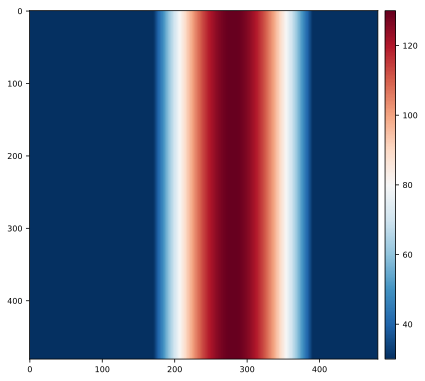

In [14]:
fig = plt.figure(1, figsize=(6,6))

ax = plt.gca()
im = ax.imshow(th, interpolation='nearest', cmap='RdBu_r',
                 vmin=th.min(), vmax=th.max())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
plt.tight_layout()

plt.show()
plt.close(fig)

In [15]:
df.to_csv('data/thlay2.csv',columns=['thickness','rockID'], sep=' ', index=False ,header=0)

Obviously you can make much more complex layer shapes and rock type distribution...